In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/colonTumor.csv")
data_length = data.shape[1]
data_length

2001

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.read_csv("data/colonTumor.csv", header=None, names=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,atribut2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [5]:
data = data.rename(columns={'atribut2000': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [6]:
data.loc[data['status'] == 'negative', ['status']] = 0
data.loc[data['status'] == 'positive', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,0
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,1
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,1
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,0


In [7]:
data = data.apply(pd.to_numeric)

In [8]:
data['status'].value_counts()

0    40
1    22
Name: status, dtype: int64

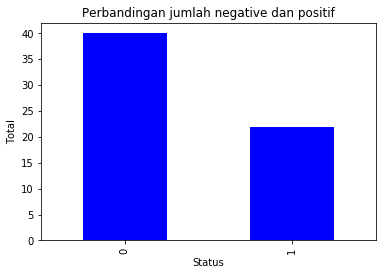

In [9]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah negative dan positif")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [10]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,7015.786710,4966.960015,4094.727879,3987.789284,2937.126113,4705.119302,3588.800323,2872.288631,4680.191160,4039.661953,...,100.227903,293.222722,124.653387,133.186935,184.136635,84.118387,114.930000,53.251230,42.965827,0.354839
std,3092.970584,2188.890480,1818.080939,2019.086903,1356.932887,2400.848112,1872.106095,1122.365448,2417.239217,2018.044248,...,78.022712,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175,0.482370
min,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,974.815480,...,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250,0.000000
25%,4877.364700,3408.951150,2763.725900,2648.942875,1890.857125,2843.368775,2112.952150,2050.814025,2971.792775,2797.992525,...,48.409375,161.518125,69.121250,71.637500,85.905059,30.701875,53.881563,27.334375,24.610000,0.000000
50%,6274.612500,4738.280700,3890.338100,3451.498200,2666.075600,4416.617850,3438.180000,2844.960650,4088.735600,3823.017900,...,83.080625,251.883125,114.658125,104.271875,142.578570,56.385625,93.825625,45.358125,34.775000,0.000000
75%,8712.283175,6455.843200,5008.993750,4738.408950,3563.969325,6076.032125,4420.645350,3414.228475,6171.382800,4840.715500,...,117.208438,424.742500,177.730312,149.772188,212.019940,101.231250,145.074062,66.235312,54.697500,1.000000
max,14876.407000,10152.273000,8605.043800,11248.680000,8093.875000,11222.682000,9939.246200,5917.026300,14144.835000,12307.913000,...,438.383750,902.572500,333.418750,464.930000,702.130950,405.600000,390.890000,197.220000,126.826250,1.000000


In [11]:
X = data.drop(['status'],axis=1)
y = data['status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [13]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [14]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

## Reduksi Dimensi

In [15]:
# korelasi = data.corr().drop(['status'],axis=1).drop(['status'],axis=0)
# korelasi.columns

In [16]:
from sklearn.feature_selection import f_classif
f_score, f_p_value = f_classif(X,y)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

F - score score    [2.55784009e+00 1.73585079e+00 3.67395268e+00 ... 2.42752763e+00
 2.08849545e-03 9.56459514e-01]
F - score p-value  [0.11500158 0.1926744  0.06003501 ... 0.12448029 0.96370108 0.33200741]


In [17]:
import random

In [18]:
def random_subset(s, n_features = 3, n_iter=10):
    listSubset = []
    for i in range(n_iter):
        listSubset.append(random.sample(list(s),n_features))
    return listSubset

In [19]:
def count_redundancy(cor):
    korr = []
    korr = cor.values
    np.fill_diagonal(korr,0)
    korr = np.concatenate(korr)
    korr = np.unique(korr)
    sum_kor = np.sum(korr)
    return sum_kor

In [20]:
def mrmr(X,y,n_features=3,n_iter=10):
    subset = random_subset(X.columns,n_features,n_iter)
    mrmr_list = []
    for i in subset:
        korelasi = X[i].corr()
        red = count_redundancy(korelasi)
        f_score, f_p_value = f_classif(X[i],y)
        rel = np.sum(f_score)
        mrmr_score = rel - ((1/len(subset))*red)
        mrmr_list.append((i,mrmr_score))
    return sorted(mrmr_list,key=lambda l:l[1],reverse=True)

In [116]:
taken_featuresTrain = mrmr(X_train,y_train,5000,10)[0][0]
taken_featuresTrain

ValueError: Sample larger than population or is negative

In [ ]:
X_train_mrmr = X_train[taken_featuresTrain].copy()

In [117]:
taken_featuresTest = mrmr(X_test,y_test,5000,10)[0][0]
taken_featuresTest

ValueError: Sample larger than population or is negative

In [100]:
X_test_mrmr = X_test[taken_featuresTest].copy()

In [101]:
model_rfg = RandomForestClassifier()

In [102]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

In [103]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_train_mrmr, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [104]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}

0.674 (+/-0.038) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.674 (+/-0.038) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.634 (+/-0.082) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.674 (+/-0.038) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.674 (+/-0.038) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.632 (+/-0.104) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.653 (+/-0.052) for {'n_estimators': 400, 'min_samples_split': 2, '

In [105]:
random_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'bootstrap': False}

In [106]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['log2'],
               'min_samples_split': [10],
               'min_samples_leaf': [2],
               'bootstrap': [False]
                     }

In [107]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_train_mrmr, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.3s finished


Best Params :  {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

0.674 (+/-0.038) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
0.674 (+/-0.038) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 400}
0.653 (+/-0.052) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 600}
0.674 (+/-0.038) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 800}
0.674 (+/-0.038) for {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}


In [108]:
classifier = grid_search.best_estimator_

In [109]:
classifier.fit(X_train_mrmr, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
prediksi = classifier.predict(X_test_mrmr)
prediksi

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [111]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

,status,status predicted
5,1,0
27,0,0
59,1,0
40,0,0
41,1,0
52,0,0
25,0,0
19,1,1
26,0,0
18,0,0


In [112]:
accuracy_score(y_test,prediksi)

0.6923076923076923

In [113]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.20      0.33         5

    accuracy                           0.69        13
   macro avg       0.83      0.60      0.57        13
weighted avg       0.79      0.69      0.62        13



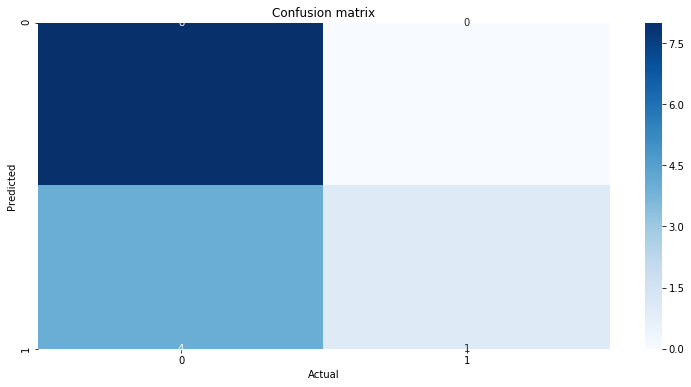

In [114]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [115]:
confusion_matrix(y_test,prediksi)

array([[8, 0],
       [4, 1]], dtype=int64)